> ### **Titanic - Survival Prediction**
* This project aims to make use of machine learning to perfrom data analysis and prediction on the Titanic dataset. The prediction will reveal whether or not passengers will survive the shipwreck. To be able to perform this prediction, top classification models have been chosen, and will be built on the training dataset. After being evaluated on a validatio data, the model that performs the best is chosen to predict passengers' survival on the testing data.
* The project begins with loading and cleaning the dataset. This will include identfying missing values, and certain feature engineering that is believed to be beneficial to model building. After preprocessing the data, relationships between features and the target is visualized and analyzed. Following that will be preparing the data for model training and then model evaluation. The best performing model will be saved for later use, and prediction result is discussed with the aid of graphical representation.

In [1]:
from functions import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
training_data_path ="Data/train.csv"
testing_data_path = "Data/test.csv"

In [3]:
functions_train = Functionalities(training_data_path)
functions_test = Functionalities(testing_data_path)

### **Loading The Dataset**

In [4]:
pd.set_option('display.max_rows', None)

In [5]:
df = functions_train.get_data()

In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### **Data Cleaning and Feature Engineering**

In [7]:
shape_before = df.shape
print("Original Shape: ", shape_before)

Original Shape:  (891, 12)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#### Checking for Null values

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

> Features **Age**, **Cabin** and **Embarked** have missing values. But since, specially for **Cabin** and **Age**, this datapoints are large in number, so it is a good idea to first see their impact on passangers' survival before deciding what to do about them.

#### Handling missing Values for **Age**, **Cabin** and **Embarked** Features

The features **Age**, **Cabin** and **Embarked** are subject of interest. But since dropping the missing values significantly affects the size of the dataset for features **Age** and **Cabin**, another option should be explored. 

#### **Age**

To figure out the right value to fillin the missing values in the **Age** feature, its relationship with features it is highly correlated is first explored. The **Pclass** feature is the target for this experiment.

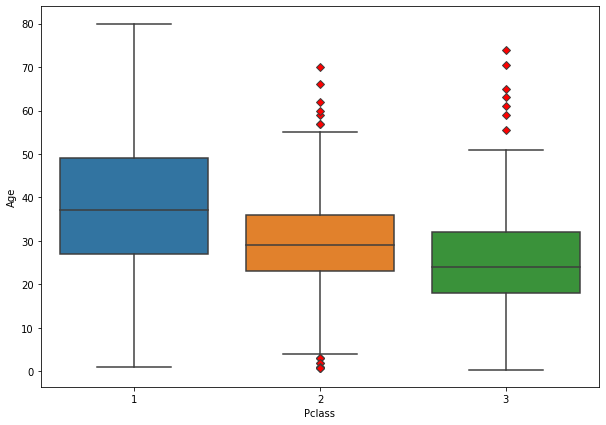

In [11]:
plt.figure(figsize=(10,7))
flier = dict(markerfacecolor='red', marker='D')
sns.boxplot(data=df, x="Pclass", y="Age", flierprops=flier)
plt.show()

From the plot above, it can be surmised that **Pclass** catagories are highly affected **age group**. So, one reasonable approach is to tailer to fillin the missing values to their Pclass category.Based on the categories, the missing values on the **Age** feature is filled with the respective median values.
* Choosing the median value is better for imputation in the case of outliers

In [12]:
df = functions_train.age_preprocess()

/home/yab/Documents/Master's Applications 2023/Saskatchewan University/Tasks/Titanic/functions.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (self.data).Age[i] = median3
/home/yab/Documents/Master's Applications 2023/Saskatchewan University/Tasks/Titanic/functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (self.data).Age[i] = median2
/home/yab/Documents/Master's Applications 2023/Saskatchewan University/Tasks/Titanic/functions.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

#### **Cabin**

To understand the extent to which the missing values on the **Cabin** feature impact passengers' survival, I will replace those missing values with **0**. Similarly I will replace the datapoints with values present with **1** to better assess the dynamic at play.

In [13]:
print("\nBefore filling the missing values:")
df.Cabin[:5]


Before filling the missing values:


0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [14]:
df = functions_train.cabin_preprocess()

In [15]:
print("\nAfter filling the missing values:")
df.Cabin[:5]


After filling the missing values:


0    0
1    1
2    0
3    1
4    0
Name: Cabin, dtype: int64

#### Plotting for Cabin versus Survival

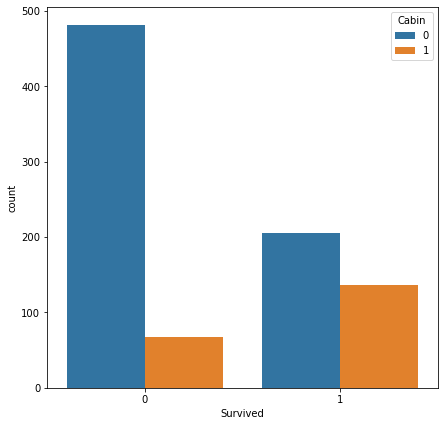

In [16]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x="Survived", hue="Cabin")
plt.show()

It can be derived from the plot that datapoints with missing values for the **Cabin** feature have major contributions to the target feature. Although some of the datapoints contribute to the death of passangers, the majority contribute to those who survived. Therefore, considering a value of **0** for the missing values in this feature is an acceptable risk.

#### **Embarked**

In the case of the feature **Embarked**, there are only two missing values. Therefore, removing the datapoints associated with those two missing values is the next logical step.

In [17]:
df = functions_train.remove_nan()

In [18]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,0,C


In [19]:
shape_after = df.shape
shape_diff = shape_before[0] - shape_after[0]

In [20]:
print("Original Shape: ", shape_before, "\nShape after droping null values: ", shape_after)

Original Shape:  (891, 12) 
Shape after droping null values:  (889, 12)


In [21]:
print("Number of datapoints removed: ", shape_diff)

Number of datapoints removed:  2


The **Sex** feature should be binarized. To do that, first let's see how many genders there are.

In [22]:
print(df.Sex.unique())

['male' 'female']


There are only two genders, so the values **0** and **1** will be assigned in place of **male** and **female**, respectively.

In [23]:
df = functions_train.sex_preprocess()

In [24]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S
5,6,0,3,"Moran, Mr. James",0,24.0,0,0,330877,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,C


Next, the **Embarked** feature will be subject to feature engineering. To do this, separate features are created and binarized to represent each embarkment. But since working out for the two embarkments also represents the third embarkment (when the two take the value 0), the **Embarked** feature is only re-engineering into two.

In [25]:
df = functions_train.embark_preprocess()

In [26]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,0
5,6,0,3,"Moran, Mr. James",0,24.0,0,0,330877,8.4583,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,1,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0,0,1


In [27]:
ticket_amount = len(df.Ticket.unique())
ticket_amount

681

In [28]:
non_unique_tickets = (df.shape[0]) - ticket_amount
non_unique_tickets

210

The number of unique tickets issued is 680. This tells us that there are 209 tickets that are not unique. Let's see if there is a relationship between whether is unique or not and passengers' survival. To do just that, tickets that are unique are going to be denoted by **1** and those that are not unique are going to be denoted by **0**.

In [29]:
df = functions_train.ticket_preprocess()

In [30]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,7.2500,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,1,71.2833,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,7.9250,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,53.1000,1,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,8.0500,0,1,0
5,6,0,3,"Moran, Mr. James",0,24.0,0,0,1,8.4583,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,1,51.8625,1,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,1,21.0750,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,1,11.1333,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,1,30.0708,0,0,1


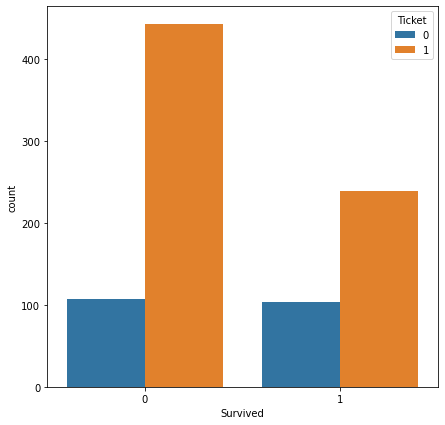

In [31]:
plt.figure(figsize=(7,7))
sns.countplot(data=df, x="Survived", hue="Ticket")
plt.show()

From the plot above, it can be surmised that passengers with tickets that are unique are more likely not to survive the calamity abroad the ship, while those with tickets that are not unique don't show a significant change in their survival.

The **Name** feature is not useful in predicting passengers' survival, so it should be removed from the data.

In [32]:
functions_train.drop_name()

In [33]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C
0,1,0,3,0,22.0,1,0,1,7.2500,0,1,0
1,2,1,1,1,38.0,1,0,1,71.2833,1,0,1
2,3,1,3,1,26.0,0,0,1,7.9250,0,1,0
3,4,1,1,1,35.0,1,0,1,53.1000,1,1,0
4,5,0,3,0,35.0,0,0,1,8.0500,0,1,0
5,6,0,3,0,24.0,0,0,1,8.4583,0,0,0
6,7,0,1,0,54.0,0,0,1,51.8625,1,1,0
7,8,0,3,0,2.0,3,1,1,21.0750,0,1,0
8,9,1,3,1,27.0,0,2,1,11.1333,0,1,0
9,10,1,2,1,14.0,1,0,1,30.0708,0,0,1


The features **Fare** and **Age** have to be checked for range variability, to decide whether normalization is required.

In [34]:
fare_range = max(df.Fare) - min(df.Fare)
age_range = max(df.Age) - min(df.Age)

In [35]:
print(f"Age Range: {age_range}\nFair Range: {fare_range}")

Age Range: 79.58
Fair Range: 512.3292


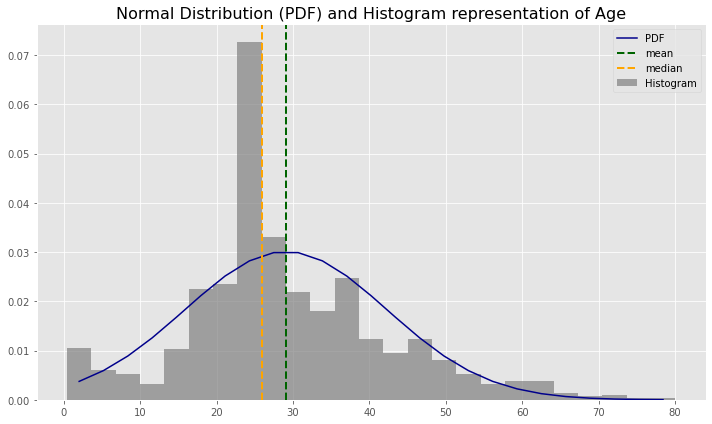

In [36]:
functions_train.hist_pdf_plot("Age")
plt.show()

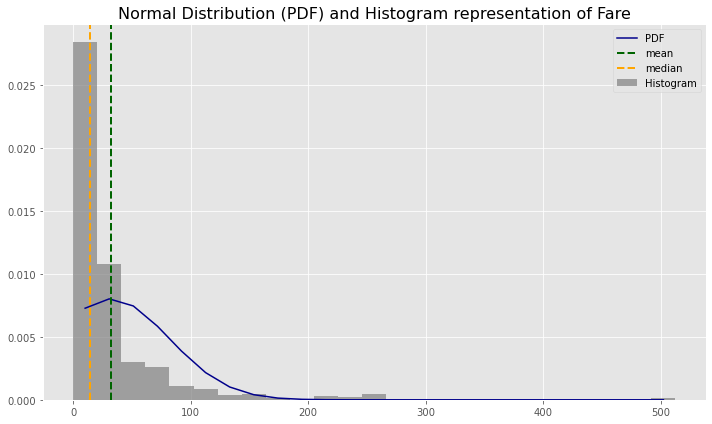

In [37]:
functions_train.hist_pdf_plot('Fare')
plt.show()

> From the range value and normal distribution curve, it can be surmised that the feature **Fare** should undergo normalization.

In [38]:
df = functions_train.normalize_fare()

In [39]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C
0,1,0,3,0,22.0,1,0,1,0.004103,0,1,0
1,2,1,1,1,38.0,1,0,1,0.040344,1,0,1
2,3,1,3,1,26.0,0,0,1,0.004485,0,1,0
3,4,1,1,1,35.0,1,0,1,0.030053,1,1,0
4,5,0,3,0,35.0,0,0,1,0.004556,0,1,0
5,6,0,3,0,24.0,0,0,1,0.004787,0,0,0
6,7,0,1,0,54.0,0,0,1,0.029353,1,1,0
7,8,0,3,0,2.0,3,1,1,0.011928,0,1,0
8,9,1,3,1,27.0,0,2,1,0.006301,0,1,0
9,10,1,2,1,14.0,1,0,1,0.017019,0,0,1


### **Data Analysis and Visualization**

In [40]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.066409,0.523008,0.381594,0.764310,0.018227,0.228956,0.722783,0.188552
std,257.353842,0.486592,0.836071,0.477990,13.244532,1.102743,0.806057,0.424668,0.028125,0.420397,0.447876,0.391372
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.000000,0.004477,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,1.000000,0.008181,0.000000,1.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,1.000000,0.017545,0.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.000000,0.289963,1.000000,1.000000,1.000000


In [41]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.035840,-0.057527,-0.001652,-0.237735,0.012658,0.019919,0.022148,-0.001205
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.047255,-0.035322,0.081629,-0.121766,0.257307,0.316912,-0.155660,0.168240
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.408487,0.083081,0.018443,0.116504,-0.549500,-0.725541,0.081720,-0.243292
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.078421,0.114631,0.245489,-0.188163,0.182333,0.140391,-0.125722,0.082853
Age,0.035840,-0.047255,-0.408487,-0.078421,1.000000,-0.243526,-0.171095,0.128655,0.123784,0.276032,0.007763,0.040700
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.243526,1.000000,0.414838,-0.405887,0.159651,-0.040460,0.070941,-0.059528
Parch,-0.001652,0.081629,0.018443,0.245489,-0.171095,0.414838,1.000000,-0.393449,0.216225,0.036987,0.063036,-0.011069
Ticket,-0.237735,-0.121766,0.116504,-0.188163,0.128655,-0.405887,-0.393449,1.000000,-0.323791,-0.119070,0.010542,-0.056814
Fare,0.012658,0.257307,-0.549500,0.182333,0.123784,0.159651,0.216225,-0.323791,1.000000,0.482075,-0.166603,0.269335
Cabin,0.019919,0.316912,-0.725541,0.140391,0.276032,-0.040460,0.036987,-0.119070,0.482075,1.000000,-0.110087,0.208528


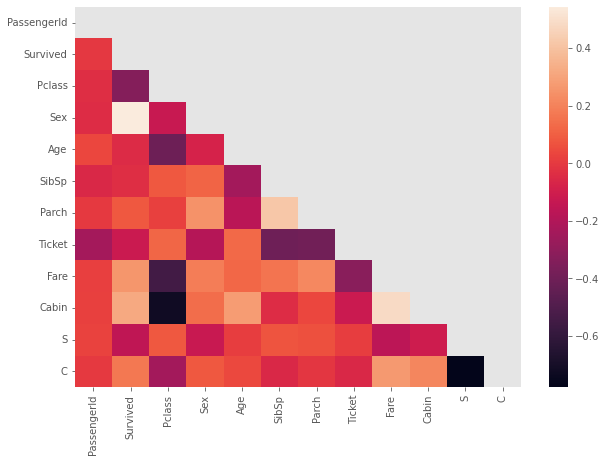

In [42]:
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot=False)
plt.show()

#### Getting a sense of survival percentage through visual representation

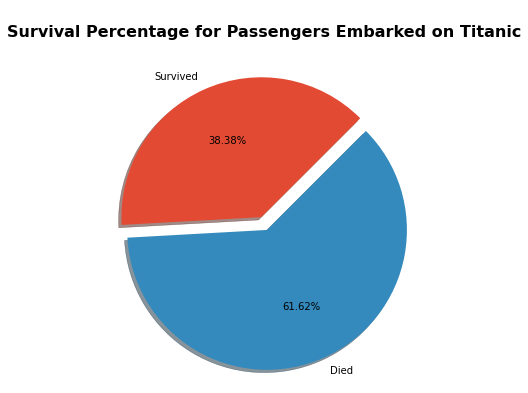

In [43]:
functions_train.surv_plot()
plt.show()

#### Creating pairplot to plot multiple pairwise bivariate distributions in the dataset will give us more visual details

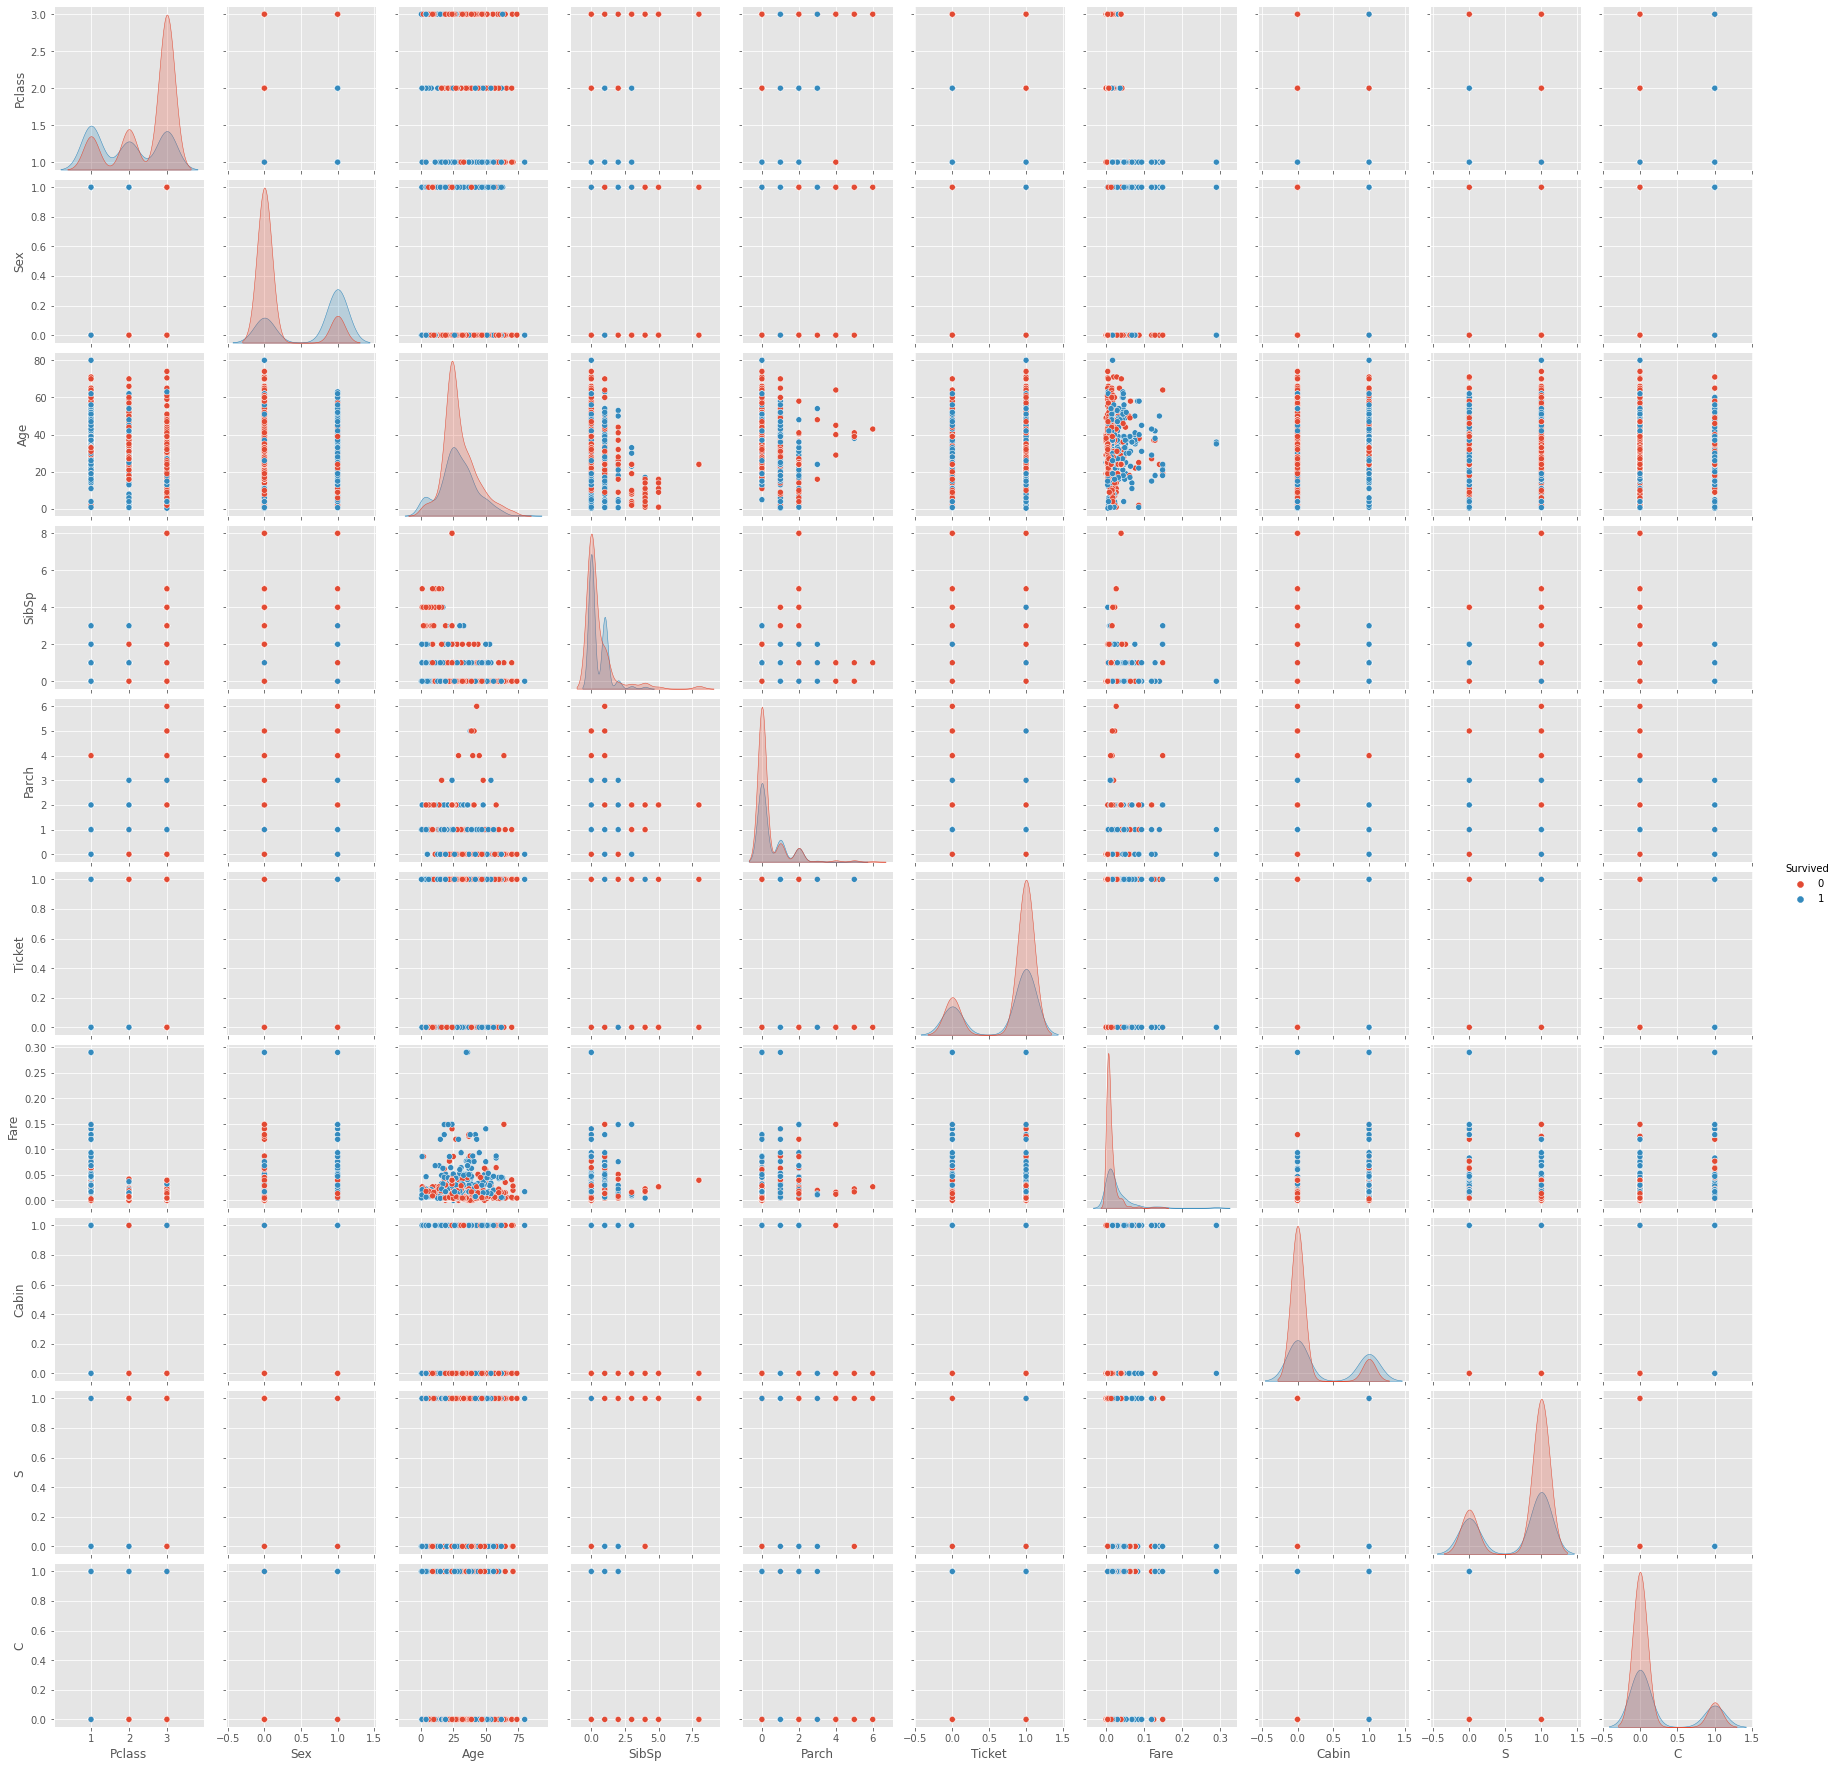

In [44]:
numeric_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'S', 'C', 'Survived']
sns.pairplot(df[numeric_col], hue="Survived")
plt.show()

#### Plotting for the relationship between target and features showing high correlation

In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'S', 'C'],
      dtype='object')

#### **Sex vs. Survival**

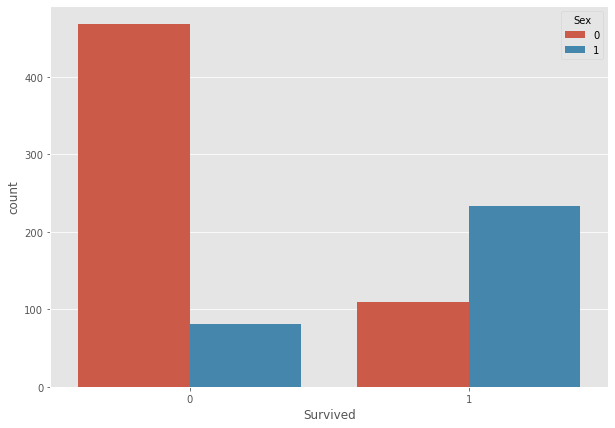

In [46]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Survived", hue="Sex")
plt.show()

Female count corresponds to a high degree of survival, while majority of male passengers are among those who didn't make it out alive. 

#### **Fare vs. Survival**

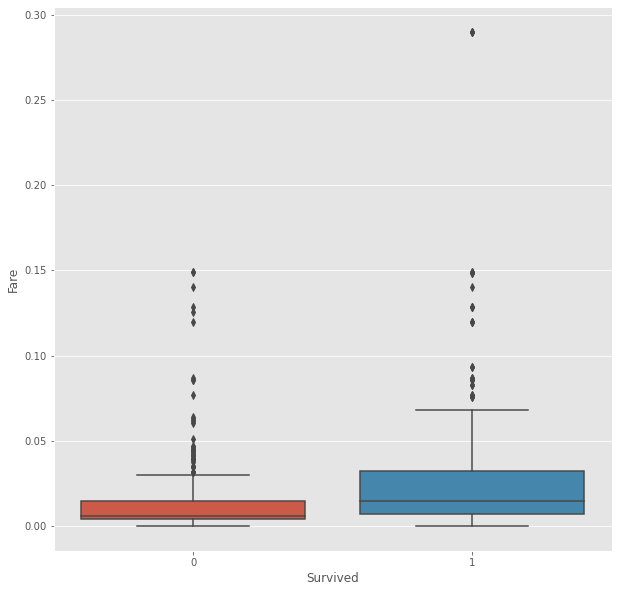

In [47]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x="Survived", y="Fare")
plt.show()

The quartile distribution depicts that those who paid larger fees were more likely to survive.

#### **Age vs. Survival**

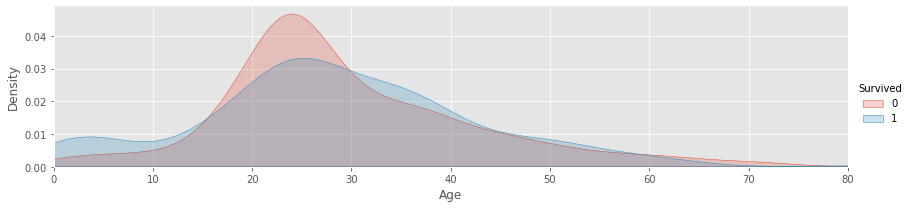

In [48]:
facetGrid = sns.FacetGrid(df, hue="Survived", aspect=4)
facetGrid.map(sns.kdeplot, "Age", shade=True)
facetGrid.set(xlim=(0,df["Age"].max()))
facetGrid.add_legend()
plt.show()

From the facetgrid, it can be shown that the majority of age groups who didn't survive are between **15** and **30**.

#### **Pclass vs. Survival**

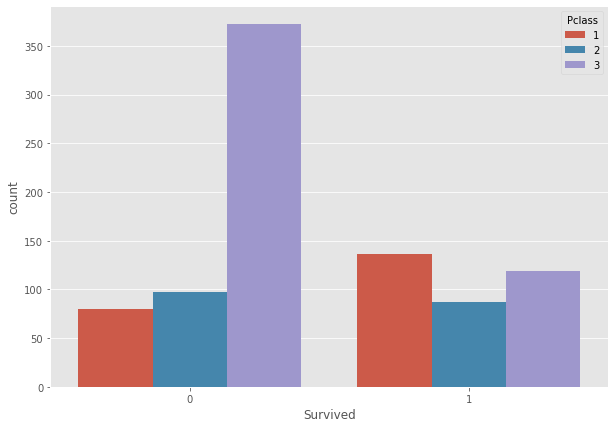

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Survived", hue="Pclass")
plt.show()

Passengers designated to **Pclass 3** majorly contributed those who didn't survive. And passengers designated to **Pclass 1** were among the majority survivors.

### **Preparing Training, Validation and Testing Sets**

#### Training and Validation Data Preparation

In [50]:
X = df.drop(["Survived"], axis=1)
X.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C
0,1,3,0,22.0,1,0,1,0.004103,0,1,0
1,2,1,1,38.0,1,0,1,0.040344,1,0,1
2,3,3,1,26.0,0,0,1,0.004485,0,1,0
3,4,1,1,35.0,1,0,1,0.030053,1,1,0
4,5,3,0,35.0,0,0,1,0.004556,0,1,0
5,6,3,0,24.0,0,0,1,0.004787,0,0,0
6,7,1,0,54.0,0,0,1,0.029353,1,1,0
7,8,3,0,2.0,3,1,1,0.011928,0,1,0
8,9,3,1,27.0,0,2,1,0.006301,0,1,0
9,10,2,1,14.0,1,0,1,0.017019,0,0,1


In [51]:
Y = df["Survived"].astype("int")
Y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

> 80% of the data will be dedicated for training while the remaining 20% will be used for validation

In [52]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state = 42)

Applying standardization to the data so it resembles more like a standard normally distributed data (resize the distribution of values so that the mean of the observed values is 0 and the standard deviation is 1) proves to be helpful for various machine learning models.

In [53]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

#### Testing Data Preparation

In [54]:
df_test = functions_test.get_data()

In [55]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [56]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

The feature **Fare** has one missing value. The missing value will be replaced by the average value of the feature's population.

In [57]:
df_test = functions_test.fare_preprocess()

Similar preprocessing will be carried out for the features **Age** and **Cabin*.

In [58]:
df_test = functions_test.age_preprocess()

/home/yab/Documents/Master's Applications 2023/Saskatchewan University/Tasks/Titanic/functions.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (self.data).Age[i] = median3
/home/yab/Documents/Master's Applications 2023/Saskatchewan University/Tasks/Titanic/functions.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (self.data).Age[i] = median1
/home/yab/Documents/Master's Applications 2023/Saskatchewan University/Tasks/Titanic/functions.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [59]:
df_test = functions_test.cabin_preprocess()

In [60]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,0,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,0,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,0,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,0,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,0,S


In [61]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now that the testing data is clear of missing values, it will undergo further cleaning and feature engineering.

In [62]:
df_test = functions_test.sex_preprocess()
df_test = functions_test.embark_preprocess()
df_test = functions_test.ticket_preprocess()
df_test = functions_test.drop_name()
df_test = functions_test.normalize_fare()

In [63]:
df_test.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,S,C
0,892,3,0,34.5,0,0,1,0.005786,0,0,0
1,893,3,1,47.0,1,0,1,0.005173,0,1,0
2,894,2,0,62.0,0,0,1,0.007160,0,0,0
3,895,3,0,27.0,0,0,1,0.006402,0,1,0
4,896,3,1,22.0,1,1,1,0.009081,0,1,0
5,897,3,0,14.0,0,0,1,0.006818,0,1,0
6,898,3,1,30.0,0,0,1,0.005638,0,0,0
7,899,2,0,26.0,1,1,1,0.021433,0,1,0
8,900,3,1,18.0,0,0,1,0.005343,0,0,1
9,901,3,0,21.0,2,0,1,0.017848,0,1,0


Save **PassengerId** for later use

In [64]:
passID = df_test["PassengerId"]

In [65]:
test_scaled = scaler.fit_transform(df_test)

### **Fitting The Data to the Selected Models**

Defining object instances for the classification models

In [66]:
lr = LogisticRegression(solver='lbfgs', max_iter=100)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=7)
dtr = DecisionTreeClassifier(random_state=32)
svc = SVC(kernel='linear', C=1.0)
rfr = RandomForestClassifier(random_state=40)

In [67]:
models = [lr, gnb, knn, dtr, svc, rfr]

Estimating the average cross-validation score for each models

In [68]:
avg_scores = functions_train.scores(models, x_train_scaled, y_train)

In [69]:
avg_scores

[0.7948685117699201,
 0.7499458288190681,
 0.7949177582980399,
 0.7416330148724514,
 0.7878853540825371,
 0.813138973702354]

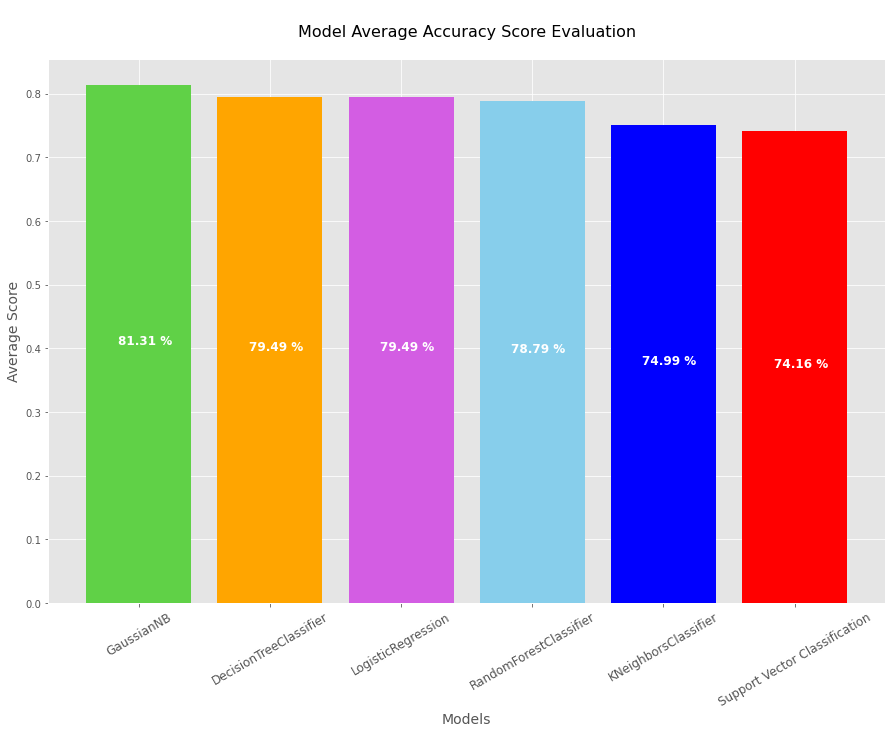

In [70]:
functions_train.score_plot(avg_scores)
plt.show()

Despite the low variation in average accuracy score, **GaussianNB** stood out first.

In [71]:
best_model_name = "GaussianNB"

### **Save The Best Performing Model**

To save the best performing model, first it is trained on the entire training dataset.

In [72]:
x_scaled = scaler.fit_transform(X)

In [73]:
gnb.fit(x_scaled, Y)

GaussianNB()

In [74]:
joblib.dump(gnb, best_model_name+'_saved_model.pkl')

['GaussianNB_saved_model.pkl']

### **Loading The Saved Model and Applying The Testing Data**

In [75]:
saved_model = joblib.load(best_model_name+'_saved_model.pkl')

In [76]:
test_pred = saved_model.predict(test_scaled)

In [77]:
functions_test.submission_file(passID, test_pred)

### **Analyzing Predictions Made**

In [78]:
submission_data_path = "Data/survival_submission.csv"
functions_sub = Functionalities(submission_data_path)

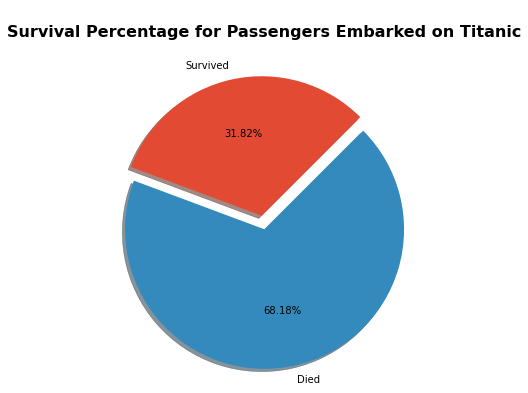

In [79]:
functions_sub.surv_plot()
plt.show()

These findings seem to be very close to the survival percentage calculated from the training dataset. It carries a difference of no more than 7% on both the percentage of those who survived and those who didn't. This could mean that the model did a good job at predicting passengers survival, but further comparsion with the real data is required to tell for sure.